# Coin Extraction

## Imports

In [7]:
%load_ext autoreload
%autoreload 2

In [146]:
from scripts.utils import read_image, extract_hsv_channels, apply_hsv_threshold
from scripts.viz import plot_images, plot_colors_histo
from skimage import filters, color, morphology, feature, data, io, transform
import PIL
import numpy as np
import cv2 as cv

In [163]:
example_imgs = ['L1010294.JPG', 'L1010367.JPG', 'L1010377.JPG']
hand_imgs = [
    "L1010373.JPG", "L1010375.JPG", "L1010377.JPG", "L1010378.JPG", 
    "L1010382.JPG", "L1010383.JPG", "L1010388.JPG", "L1010390.JPG", 
    "L1010391.JPG", "L1010395.JPG"
]

noisy_outliers = [
    "L1010462.JPG", "L1010468.JPG", "L1010470.JPG", "L1010475.JPG", 
    "L1010476.JPG", "L1010477.JPG", "L1010478.JPG", "L1010479.JPG", 
    "L1010483.JPG", "L1010485.JPG", "L1010486.JPG", "L1010487.JPG", 
    "L1010491.JPG", "L1010500.JPG", "L1010501.JPG", "L1010503.JPG"
]

## Binary Image

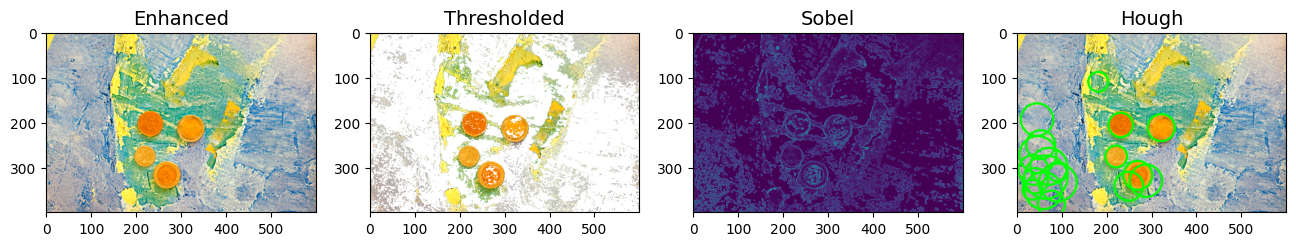

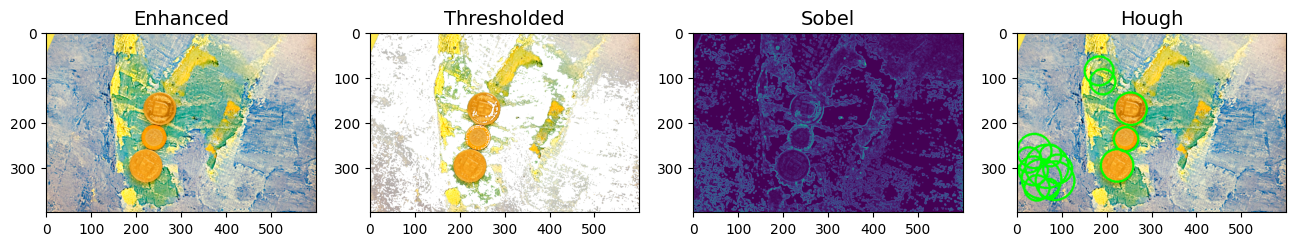

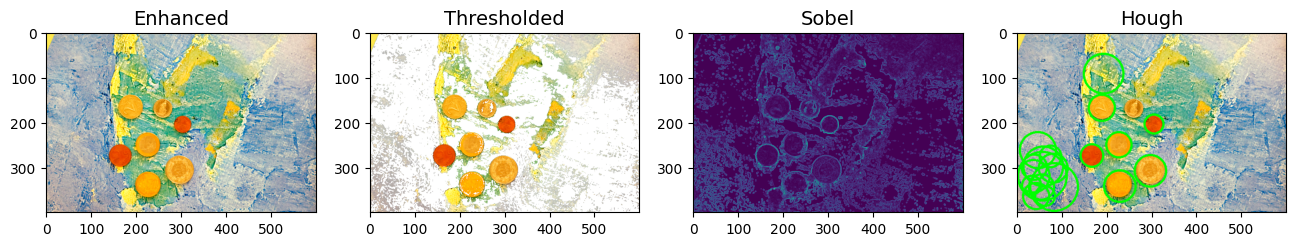

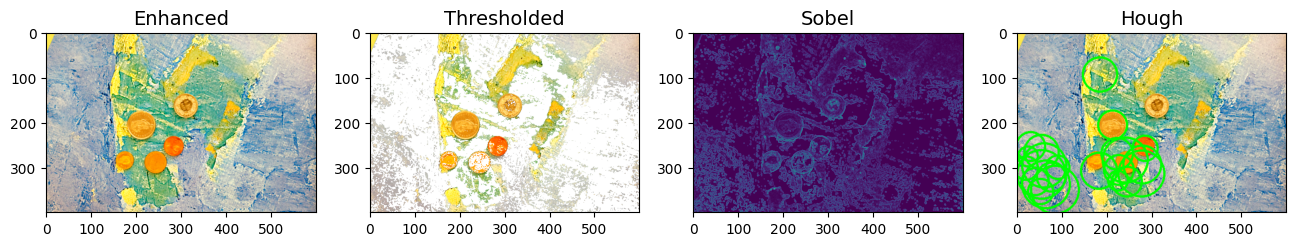

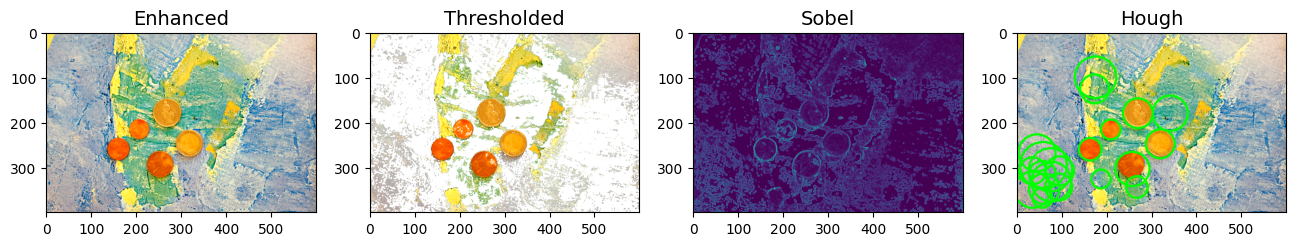

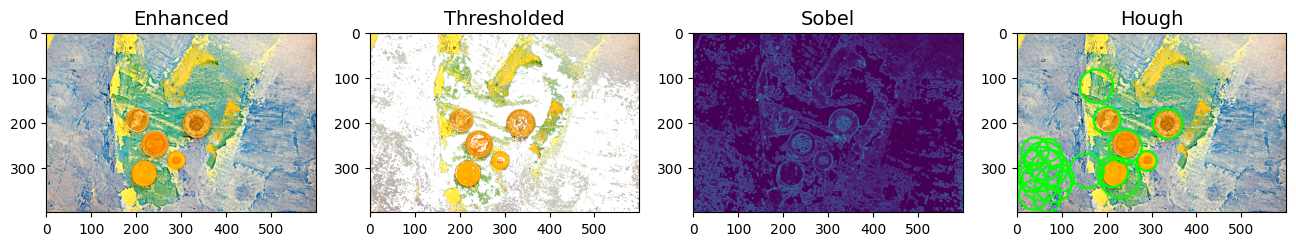

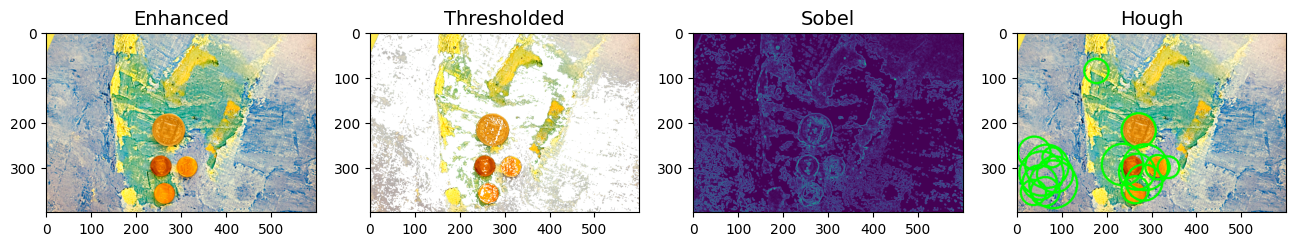

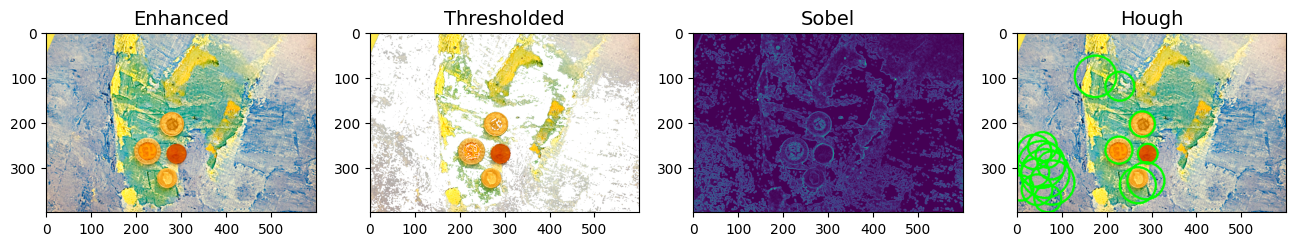

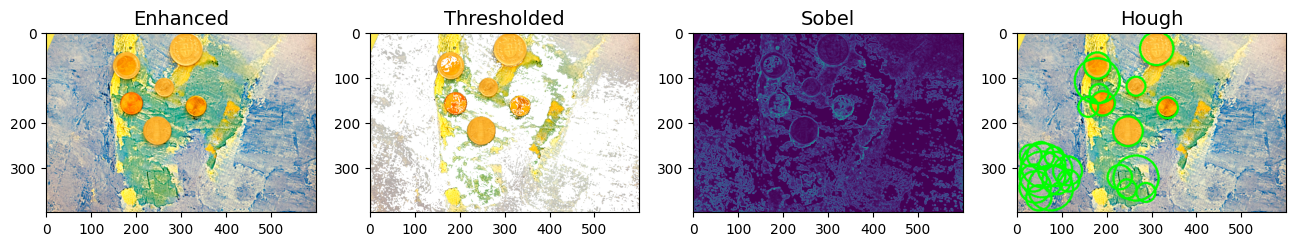

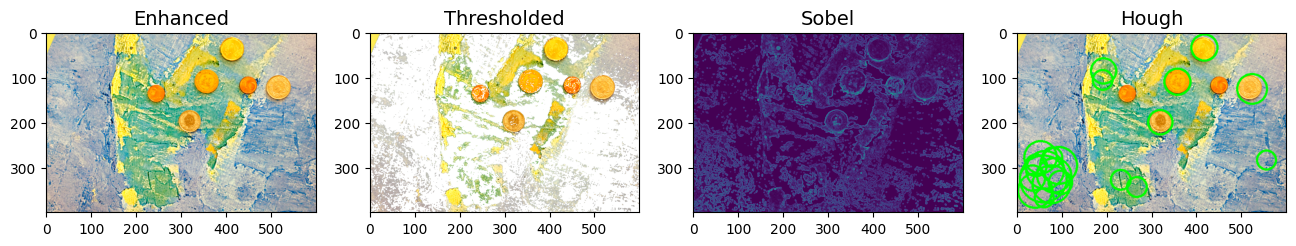

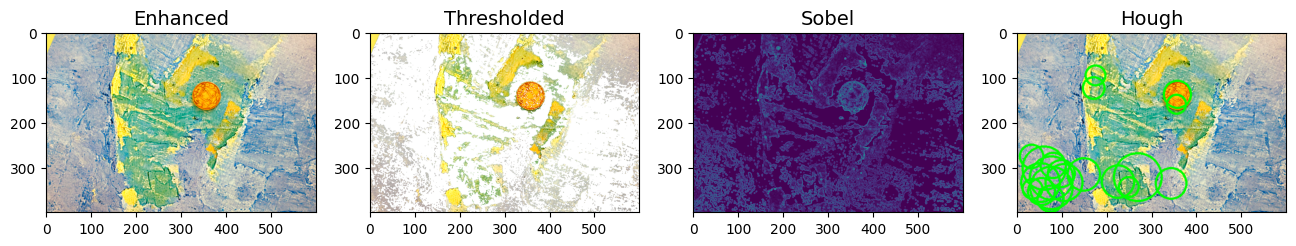

In [165]:
coin = data.coins()[170:220, 75:130]
coin = filters.sobel(coin)

for file in noisy_outliers:
    img = read_image(file)
    #increasing the brightness 20%
    pil_img = PIL.Image.fromarray(img)
    enhanced = PIL.ImageEnhance.Brightness(pil_img).enhance(0.1)
    enhanced = PIL.ImageEnhance.Contrast(pil_img).enhance(1.9)
    enhanced = np.array(enhanced)
    
    thresholded = apply_hsv_threshold(enhanced.copy())
    
    grayscale = color.rgb2gray(thresholded)
    sobel = (filters.sobel(grayscale) * 255).astype(np.uint8)
    
    thresh_sauvola = filters.threshold_sauvola(grayscale, window_size=91)
    sauvola_img = grayscale > thresh_sauvola
    
    footprint = morphology.disk(3)
    opened = morphology.binary_opening(sauvola_img, footprint)
    
    footprint = morphology.disk(3)
    closed = morphology.binary_closing(sauvola_img, footprint)
        
    # heatmap_1 = feature.match_template(color.rgb2gray(thresholded), coin)
    # heatmap_2 = feature.match_template(opened, coin)
    heatmap_sobel = feature.match_template(sobel, coin)
    
    circles = cv.HoughCircles(sobel, cv.HOUGH_GRADIENT, 1, 20, param1=200, param2=30, minRadius=20, maxRadius=55)
    circles = np.uint16(np.around(circles))
    hough_img = enhanced.copy()
    for (x, y, r) in circles[0, :]:
        cv.circle(hough_img, (x, y), r, (0, 255, 0), 4)
    
    plot_images(
        # original=img,
        enhanced=enhanced,
        thresholded=thresholded,
        # thres_heatmap=heatmap_1,
        sobel=sobel,
        # heatmap_sobel=heatmap_sobel,
        hough=hough_img
        # sauvola=sauvola_img,
        # closed=closed,
        # opened=opened
        # open_heatmap=heatmap_2
    )
    """plot_colors_histo(
        img=enhanced,
        func=extract_hsv_channels,
        labels=["Hue", "Saturation", "Value"],
    )"""

In [152]:
sobel.max()

0.5751467965164354